| Performance Drop Source  | Type                   | Fix                            |
| ------------------------ | ---------------------- | ------------------------------ |
| 🔥 Thermal throttling    | CPU slows due to heat  | Better cooling (fan, heatsink) |
| ⚡ Power throttling       | Undervoltage           | Stronger PSU                   |
| 💾 Memory-bound slowdown | Cache → RAM transition | None (architectural)           |
| 🧱 OS interference       | Background processes   | Isolate CPU cores              |


# Experiment 1 :  
Performing floating point matrix multilication operation for varying matrix sizes on CPU.

# Goal :  
To study how performance (in GFLOPS) changes as matrix size increases, due to shifts in memory access hierarchy (L1/L2 cache to DRAM). We make this observation separately for single core, double core and quad core processing. We also observe the CPU frequency to make sure that the change in performance is just due to the change in memory access.

# Common Setup across all sub experiments:  
SBC -> Raspberry pi 5, 16GB, running Raspberry Pi OS Bookworm 64-bit
Cooling -> Active cooler (fan) and heatsink  
Power Supply -> 27W USB-C Power supply  
Measurement tools -> time command, vcgencmd  
Starting temperature -> less than or equal to 45.5'C  
Scripts used -> latency_freq_bench.py  

# Independent variables:  
Matrix size -> (64 x 64) to (2048 x 2048) with step size = 64   
Number of CPU cores -> (as per sub experiment)

# Dependent variables:  
Runtime (s)  
GFLOPS  
CPU Frequency


# Experiment 1.1 : 

Independent variables:  
Number of CPU cores -> 1[0]

✅ Pinned to cores: [0]
Starting CPU Temperature: 43.90°C
Running combined latency + frequency benchmark | BLAS threads: 1

✅ Combined results saved to /home/sameer/Desktop/Codespace/Experiments/Exp1/Results/latency_freq_results[0].csv


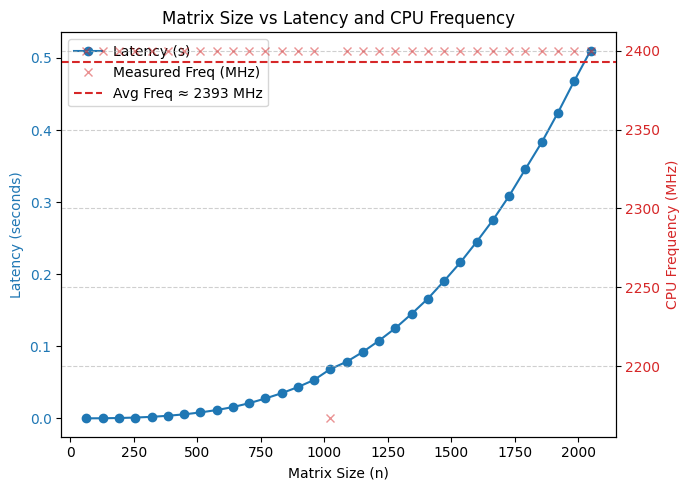

✅ Latency-Frequency plot saved to: /home/sameer/Desktop/Codespace/Experiments/Exp1/Results/matrix_size_vs_latency_freq[0].png


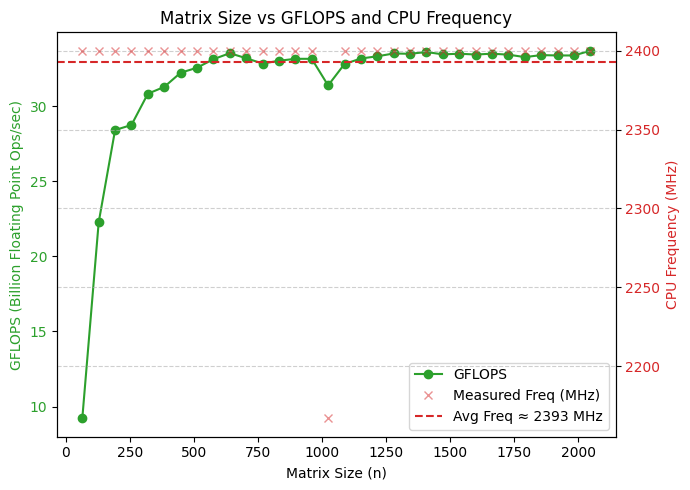

✅ GFLOPS-Frequency plot saved to: /home/sameer/Desktop/Codespace/Experiments/Exp1/Results/matrix_size_vs_gflops_freq[0].png


In [2]:
import sys, os, psutil

# Let Python find latency_bench.py (inside Scripts/)
sys.path.append("./Scripts")

# Output path for CSV (inside Results/)
csv_path = "./Results/latency_freq_results[0].csv"

# Pin to specific cores (optional)
p = psutil.Process(os.getpid())
p.cpu_affinity([0])   # use [0,1,2,3] for all cores
print("✅ Pinned to cores:", p.cpu_affinity())

# Control OpenBLAS threading
os.environ["OPENBLAS_NUM_THREADS"] = "1"  # single-core run
os.environ["OMP_NUM_THREADS"] = "1"

from latency_freq_bench import run_latency_freq_bench

run_latency_freq_bench(outfile=csv_path)

# Making Plots

from plot_latency_freq_bench import plot_latency_and_freq, plot_gflops_and_freq

plot_latency_and_freq(csv_path="./Results/latency_freq_results[0].csv", save_path="./Results/matrix_size_vs_latency_freq[0].png")
plot_gflops_and_freq(csv_path="./Results/latency_freq_results[0].csv", save_path="./Results/matrix_size_vs_gflops_freq[0].png")


# Experiment 1.2 : 

Independent variables:  
Number of CPU cores -> 2[0,1]

✅ Pinned to cores: [0, 1]
Starting CPU Temperature: 42.80°C
Running combined latency + frequency benchmark | BLAS threads: 2

✅ Combined results saved to /home/sameer/Desktop/Codespace/Experiments/Exp1/Results/latency_freq_results[0,1].csv


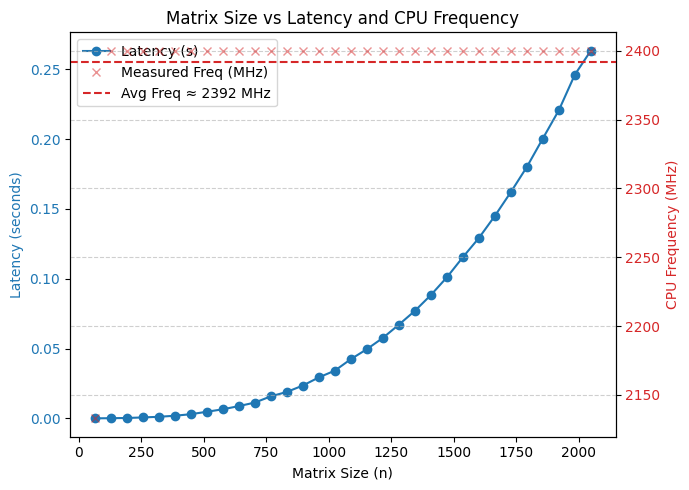

✅ Latency-Frequency plot saved to: /home/sameer/Desktop/Codespace/Experiments/Exp1/Results/matrix_size_vs_latency_freq[0,1].png


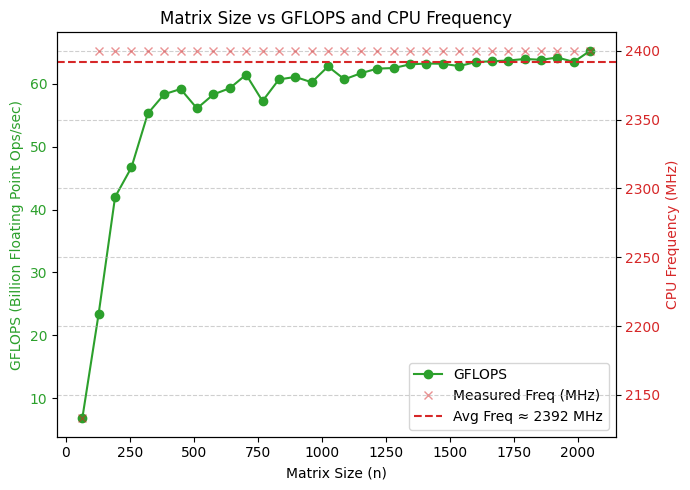

✅ GFLOPS-Frequency plot saved to: /home/sameer/Desktop/Codespace/Experiments/Exp1/Results/matrix_size_vs_gflops_freq[0,1].png


In [1]:
import sys, os, psutil

# Let Python find latency_bench.py (inside Scripts/)
sys.path.append("./Scripts")

# Output path for CSV (inside Results/)
csv_path = "./Results/latency_freq_results[0,1].csv"

# Pin to specific cores (optional)
p = psutil.Process(os.getpid())
p.cpu_affinity([0,1])   # use [0,1,2,3] for all cores
print("✅ Pinned to cores:", p.cpu_affinity())

# Control OpenBLAS threading
os.environ["OPENBLAS_NUM_THREADS"] = "2"  # double-core run
os.environ["OMP_NUM_THREADS"] = "2"

from latency_freq_bench import run_latency_freq_bench

run_latency_freq_bench(outfile=csv_path)

# Making Plots

from plot_latency_freq_bench import plot_latency_and_freq, plot_gflops_and_freq

plot_latency_and_freq(csv_path="./Results/latency_freq_results[0,1].csv", save_path="./Results/matrix_size_vs_latency_freq[0,1].png")
plot_gflops_and_freq(csv_path="./Results/latency_freq_results[0,1].csv", save_path="./Results/matrix_size_vs_gflops_freq[0,1].png")


# Experiment 1.3 : 

Independent variables:  
Number of CPU cores -> 4[0,1,2,3]

✅ Pinned to cores: [0, 1, 2, 3]
Starting CPU Temperature: 44.40°C
Running combined latency + frequency benchmark | BLAS threads: 4

✅ Combined results saved to /home/sameer/Desktop/Codespace/Experiments/Exp1/Results/latency_freq_results[0,1,2,3].csv


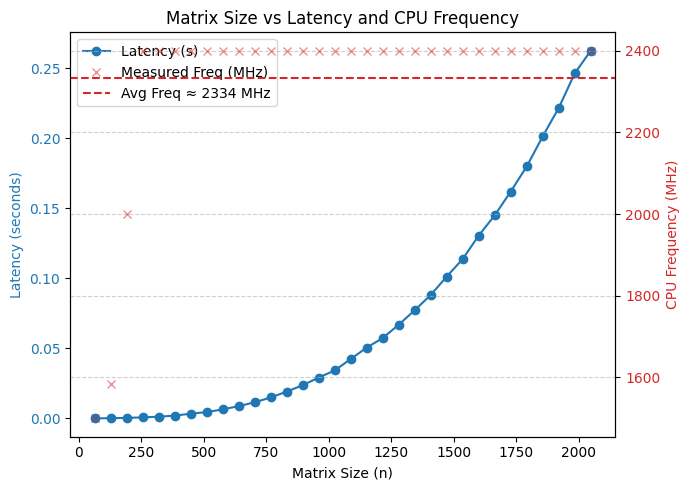

✅ Latency-Frequency plot saved to: /home/sameer/Desktop/Codespace/Experiments/Exp1/Results/matrix_size_vs_latency_freq[0,1,2,3].png


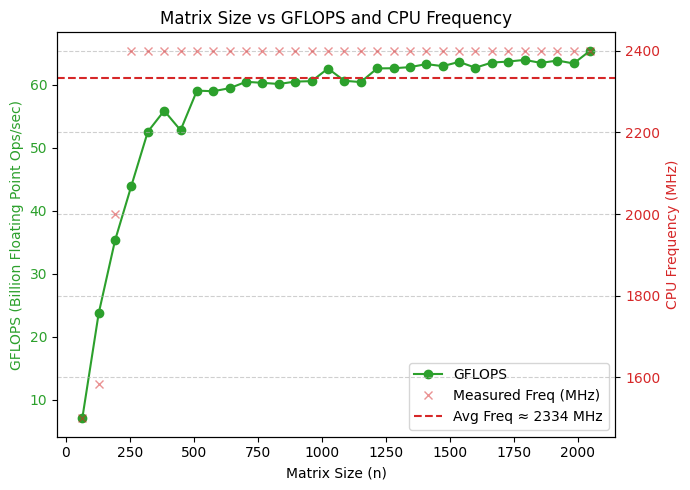

✅ GFLOPS-Frequency plot saved to: /home/sameer/Desktop/Codespace/Experiments/Exp1/Results/matrix_size_vs_gflops_freq[0,1,2,3].png


In [3]:
import sys, os, psutil

# Let Python find latency_bench.py (inside Scripts/)
sys.path.append("./Scripts")

# Output path for CSV (inside Results/)
csv_path = "./Results/latency_freq_results[0,1,2,3].csv"

# Pin to specific cores (optional)
p = psutil.Process(os.getpid())
p.cpu_affinity([0,1,2,3])   # use [0,1,2,3] for all cores
print("✅ Pinned to cores:", p.cpu_affinity())

# Control OpenBLAS threading
os.environ["OPENBLAS_NUM_THREADS"] = "4"  # single-core run
os.environ["OMP_NUM_THREADS"] = "4"

from latency_freq_bench import run_latency_freq_bench

run_latency_freq_bench(outfile=csv_path)

# Making Plots

from plot_latency_freq_bench import plot_latency_and_freq, plot_gflops_and_freq

plot_latency_and_freq(csv_path="./Results/latency_freq_results[0,1,2,3].csv", save_path="./Results/matrix_size_vs_latency_freq[0,1,2,3].png")
plot_gflops_and_freq(csv_path="./Results/latency_freq_results[0,1,2,3].csv", save_path="./Results/matrix_size_vs_gflops_freq[0,1,2,3].png")


# Observations:

Matrix multiplication of $N \times N$ requires roughly $O(N^3)$ floating point operations. So ideally we should see a cubic curve but thats not exactly what we see.

Initially for smaller size matrices, since the matrices to be multiplied can be stored in cache (L1/L2), they are accessed very fast and hence time taken to multiply them is very less and increases very slowly with the increase in matrix size.

But once we go for larger matrices, then the cache memory falls short and we move to next level in memory heirarchy and store the matrices in L3(shared cache)/DRAM. Now accessing matrices from this mmeory takes time as they are not as fast as cache memory and hence the time taken to complete the multiplication operation increases steeply with increase in the matrix size. 

Based on the cache memory size and datatype of our floating point numbers we can estimate the bottleneck for the matrix size from where the memory hierarchy will change. For e.g., L1, L2 and L3 cache memory in raspberry pi 5 is $64 KB$ (L1) + $512 KB$ (L2) + $2 MB$ (L3) = $2624 KB$.  
Taking single-point precision, i.e., float32, each element of matrix will occupy $32 b$ = $4 B$. A matrix of size $(N \times N)$ will occupy $(4 \times N \times N \;) B$. For a given matrix multiplication, three matrices of this size need to be present in memory at a given time so we need to find the value of $N$ such that, $3 \times 4 \times (N^2)$ $ <= 2624KB$. This gives us the value of N as roughly 473 and we can see from our plot that after the matrix size of 473 the growth in GFLOPS has dropped significantly as now memory access has shifted to DRAM which is much slower as compared to lower cache levels. 

Increasing the number of cores initially boosts performance, but the matrix size at which GFLOPS saturates remains nearly constant. This is because when multiple cores are used, each core operates on a subset of the output matrix but still needs to fetch corresponding blocks of the input matrices from main memory. The L1 and L2 caches on each core are private and therefore only hold the small working tiles required by that core at a given time. The matrices are not split between cores at the cache level; instead, each core maintains its own temporary copies of the necessary data in its private caches, while the full matrices reside in shared main memory.
